In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(12,12)

In [2]:
df00  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\KPI - 2019.xlsx')
df0  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\KPI - 2020.xlsx')
df1  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\KPI - 2021.xlsx')
df2  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\KPI - 2022.xlsx')
df3  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\KPI - 2023.xlsx')

In [3]:
df00['volume']=df00['Level_2_Yes'] + df00['Level_2_No']
df0['volume']=df0['Level_2_Yes'] + df0['Level_2_No']
df1['volume']=df1['Level_2_Yes'] + df1['Level_2_No']
df2['volume']=df2['Level_2_Yes'] + df2['Level_2_No']
df3['volume']=df3['Level_2_Yes'] + df3['Level_2_No']

In [4]:
df00=df00[['Date','Service_Category','volume']]
df0=df0[['Date','Service_Category','volume']]
df1 = df1[['Date','Service_Category','volume']]
df2 = df2[['Date','Service_Category','volume']]
df3 = df3[['Date','Service_Category','volume']]

In [5]:
df_KPI=pd.concat([df00,df0,df1,df2,df3],ignore_index=True)

In [6]:
df_KPI.head()

Date Service_Category  volume
0  2019-10-29 00:00:00           99 KPI       9
1  2019-10-29 00:00:00           99 KPI       6
2  2019-10-29 00:00:00           99 KPI       2
3  2019-10-29 00:00:00           99 KPI       2
4  2019-10-29 00:00:00           99 KPI      14

In [7]:
df_KPI['Service_Category'].value_counts()

99 KPI                        182599
Submit Change to UW             1889
Late Payment Notifications       992
Maturities                       482
Name: Service_Category, dtype: int64

In [366]:
df_LPN=df_KPI[df_KPI['Service_Category']=='Late Payment Notifications']

In [367]:
df_LPN['volume'].value_counts()

0    992
Name: volume, dtype: int64

In [368]:
df_SC=df_KPI[df_KPI['Service_Category']=='Submit Change to UW']

In [369]:
df_SC['volume'].value_counts()

0    1889
Name: volume, dtype: int64

In [370]:
df_Mar=df_KPI[df_KPI['Service_Category']=='Maturities']

In [371]:
df_Mar['volume'].value_counts()

0    482
Name: volume, dtype: int64

In [8]:
df_99KPI=df_KPI[df_KPI['Service_Category']=='99 KPI']

In [10]:
df_99KPI.tail()

Date Service_Category  volume
185954  2023-10-31 00:00:00           99 KPI      14
185955  2023-10-31 00:00:00           99 KPI       1
185956  2023-10-31 00:00:00           99 KPI       7
185957  2023-10-31 00:00:00           99 KPI       5
185958  2023-10-31 00:00:00           99 KPI      34

In [11]:
df_99KPI['Date']=pd.to_datetime(df_99KPI['Date'])
df_99KPI = df_99KPI.set_index('Date')
df_99KPI = df_99KPI.resample('M').sum()

C:\Users\255046\AppData\Local\Temp\ipykernel_13024\1460808598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_99KPI['Date']=pd.to_datetime(df_99KPI['Date'])


In [15]:
df_99KPI.to_excel("99 KPI Actual.xlsx")

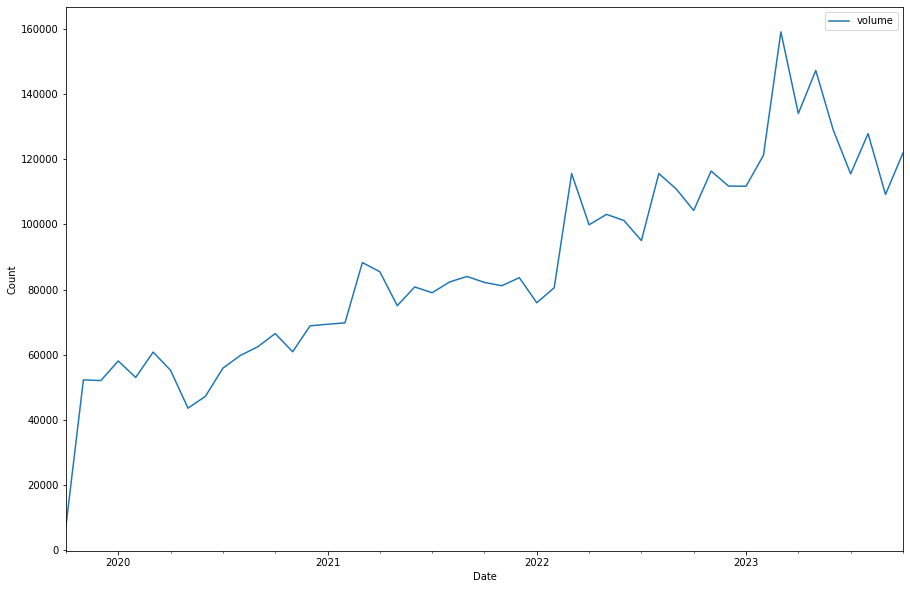

In [376]:
df_99KPI.plot(figsize=(15,10))
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

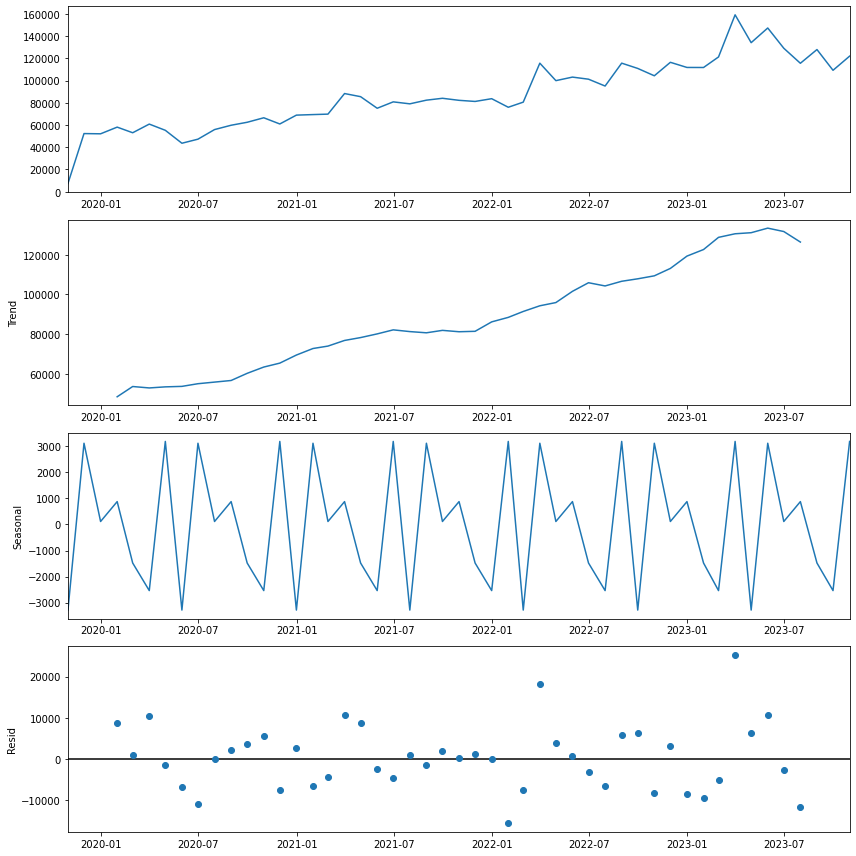

In [377]:
from statsmodels.tsa.seasonal import seasonal_decompose
# temp = df2[['Refferal_Count']]
decom = seasonal_decompose(df_99KPI, model='additive', period=7)
decom.plot()
plt.show()

In [315]:
print(len(df_99KPI)*0.8)
train_df = df_99KPI[0:39]
test_df = df_99KPI[39::]
print(len(df_99KPI))
print(len(train_df))
print(len(test_df))

39.2
49
39
10


In [378]:
sarimax_model1=SARIMAX(df_99KPI['volume'],order=(0,1,2),seasonal_order=(0,1,2,7)).fit()

0.10744888833536403


<Axes: xlabel='Date'>

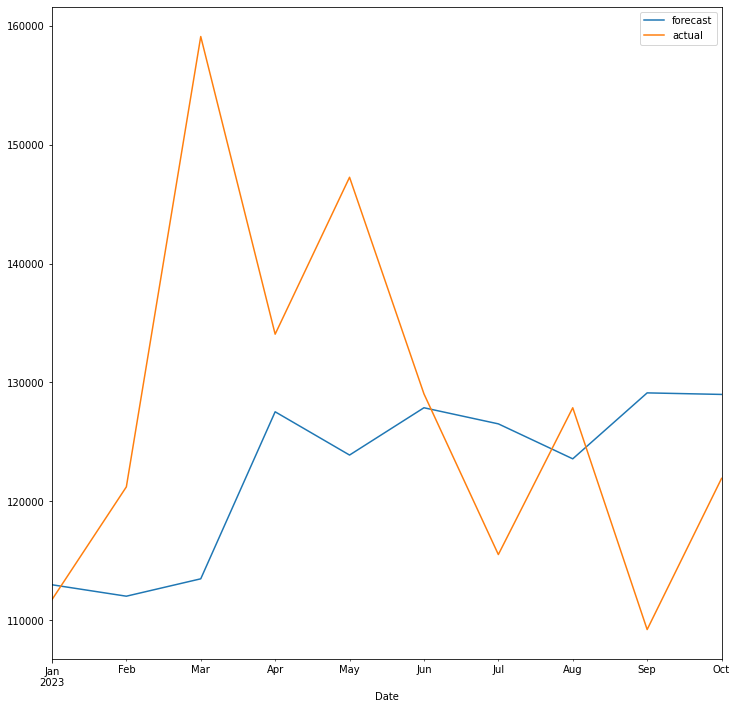

In [352]:
df_sarimax_forecast1=pd.DataFrame()
df_sarimax_forecast1['forecast'] = sarimax_model1.predict(start=40,end=49)
df_sarimax_forecast1.index=test_df.index
df_sarimax_forecast1['actual'] = test_df['volume']
print(mean_absolute_percentage_error(df_sarimax_forecast1['forecast'], df_sarimax_forecast1['actual']))
df_sarimax_forecast1.plot()

In [379]:
forecast_days = pd.bdate_range(start='2024-01-01',end='2024-12-01',freq='MS')

In [380]:
forecast_days.shape

(12,)

In [381]:
49+12

61

In [382]:
df_forecast=pd.DataFrame()
df_forecast['forecast'] =sarimax_model1.predict(start=50, end=61)
df_forecast['Date']=forecast_days

In [383]:
df_forecast[['Date','forecast']].to_csv('F&G PHS Transaction Volume Forecast_KPI-Month-99KPI.csv',index=False)

In [ ]:
----------------------------------------------------------------------------------------------------------------------------------

In [40]:
df00=df00[['Date','Service_Category','volume']]
# df0=df0[['Date','volume']]
# df1 = df1[['Date','volume']]
# df2 = df2[['Date','volume']]
# df3 = df3[['Date','volume']]

In [127]:
df00 = df00.set_index('Date')
df00 = df00.resample('M').sum()

In [128]:
df0 = df0.set_index('Date')
df0 = df0.resample('M').sum()

In [129]:
df1 = df1.set_index('Date')
df1 = df1.resample('M').sum()

In [130]:
df2['Date']=pd.to_datetime(df2['Date'])
df2 = df2.set_index('Date')
df2 = df2.resample('M').sum()

In [131]:
df3 = df3.set_index('Date')
df3 = df3.resample('M').sum()

In [132]:
df3.head()

volume
Date              
2023-01-31  111731
2023-02-28  121219
2023-03-31  159094
2023-04-30  134060
2023-05-31  147258

In [133]:
df_KPI=pd.concat([df00,df0,df1,df2,df3])

In [135]:
df_KPI.tail()

volume
Date              
2023-06-30  129041
2023-07-31  115528
2023-08-31  127872
2023-09-30  109219
2023-10-31  121929

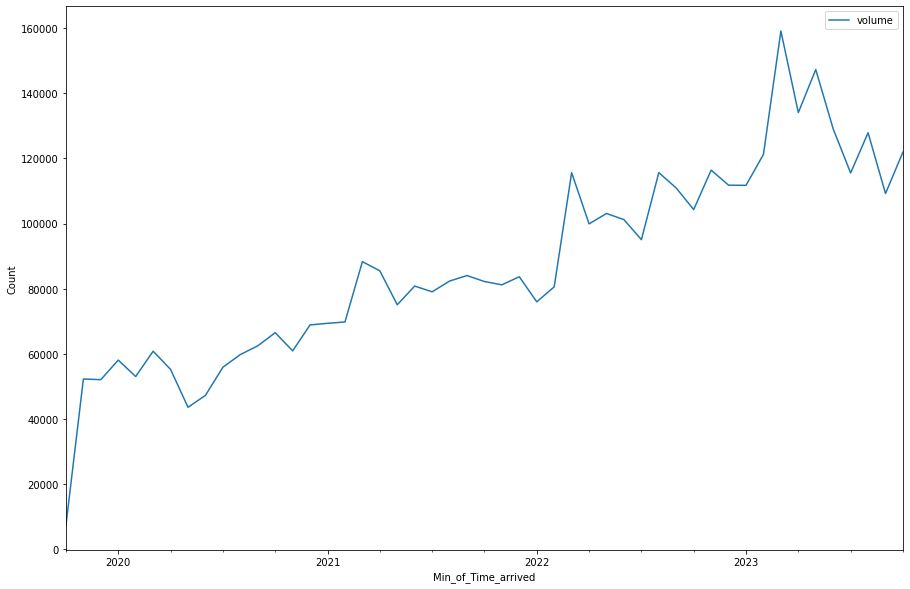

In [137]:
#df_KPI = df_KPI.set_index('Date')
df_KPI.plot(figsize=(15,10))
plt.xlabel('Min_of_Time_arrived')
plt.ylabel('Count')
plt.show()

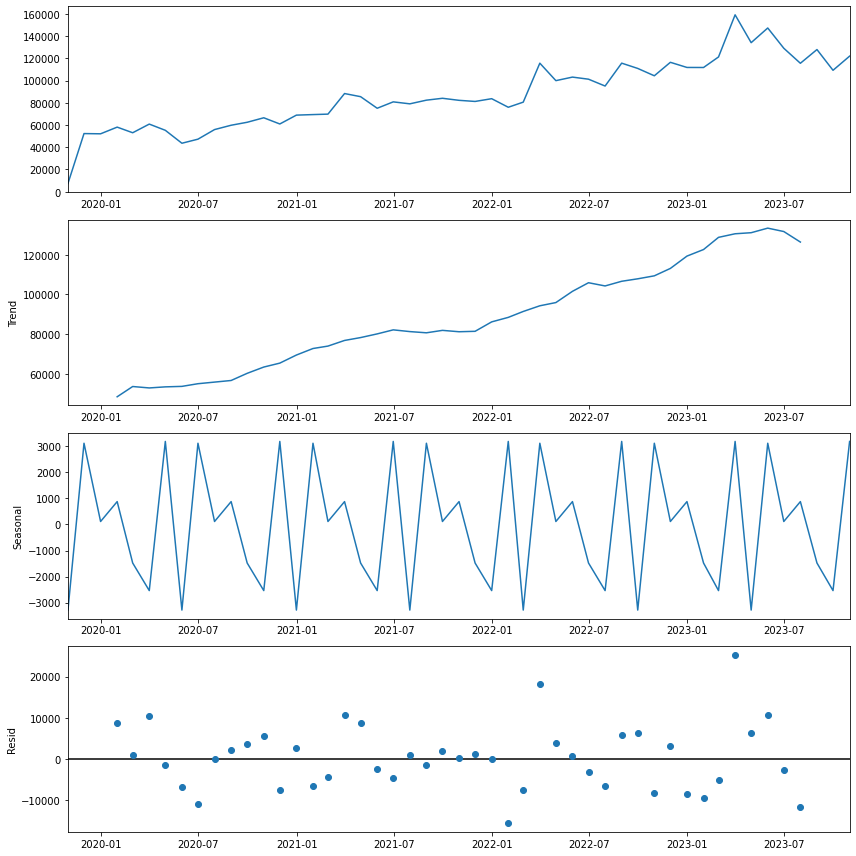

In [141]:
from statsmodels.tsa.seasonal import seasonal_decompose
# temp = df2[['Refferal_Count']]
decom = seasonal_decompose(df_KPI, model='additive', period=7)
decom.plot()
plt.show()

In [41]:
#df_19=df00[df00['Service_Category']=='99KPI']
# resample(Month) -df1 = df.resample('M', on='Date').sum()

In [156]:
print(len(df_KPI)*0.8)
train_df = df_KPI[0:40]
test_df = df_KPI[40::]
print(len(df_KPI))
print(len(train_df))
print(len(test_df))

39.2
49
40
9


In [330]:
sarimax_model1=SARIMAX(train_df['volume'],order=(1,2,0),seasonal_order=(2,2,2,7)).fit() 

0.1111464448907928


<Axes: xlabel='Date'>

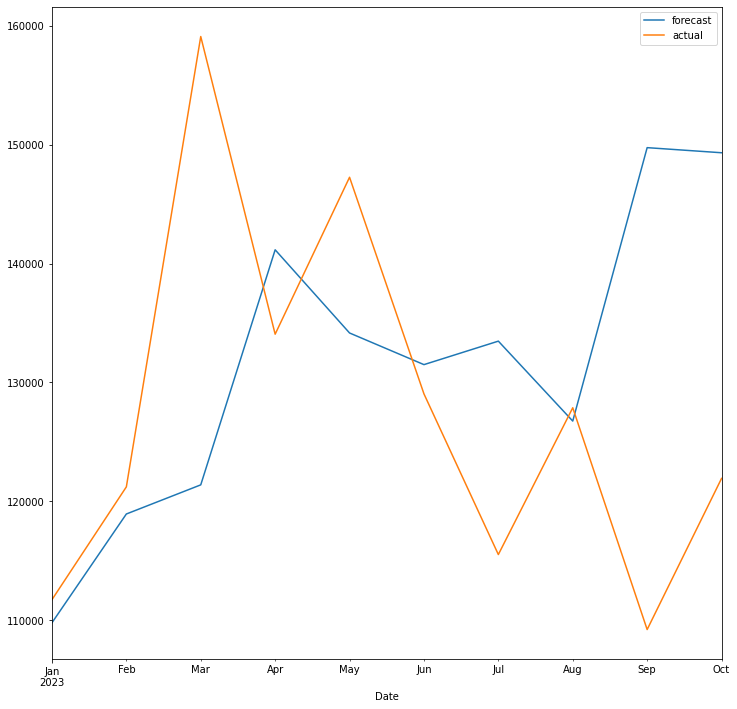

In [331]:
df_sarimax_forecast1=pd.DataFrame()
df_sarimax_forecast1['forecast'] = sarimax_model1.predict(start=40,end=49)
df_sarimax_forecast1.index=test_df.index
df_sarimax_forecast1['actual'] = test_df['volume']
print(mean_absolute_percentage_error(df_sarimax_forecast1['forecast'], df_sarimax_forecast1['actual']))
df_sarimax_forecast1.plot()

In [ ]:
---------------------------------------------------------------------------------------------------------------------------------------

In [60]:
df00['Date']=df00['Date'].dt.date
df00['Date']=pd.to_datetime(df00['Date'])
df00 = pd.DataFrame(df00.groupby(['Date','Service_Category'])['volume'].sum()).reset_index()

In [61]:
df0['Date']=df0['Date'].dt.date
df0['Date']=pd.to_datetime(df0['Date'])
df0 = pd.DataFrame(df0.groupby(['Date','Service_Category'])['volume'].sum()).reset_index()

In [62]:
df1['Date']=df1['Date'].dt.date
df1['Date']=pd.to_datetime(df1['Date'])
df1 = pd.DataFrame(df1.groupby(['Date','Service_Category'])['volume'].sum()).reset_index()

In [63]:
#df2['Date']=df2['Date'].dt.date
df2['Date']=pd.to_datetime(df2['Date'])
df2 = pd.DataFrame(df2.groupby(['Date','Service_Category'])['volume'].sum()).reset_index()

In [64]:
df3['Date']=df3['Date'].dt.date
df3['Date']=pd.to_datetime(df3['Date'])
df3 = pd.DataFrame(df3.groupby(['Date','Service_Category'])['volume'].sum()).reset_index()

In [65]:
df_KPI=pd.concat([df00,df0,df1,df2,df3],ignore_index=True)

In [66]:
df_KPI['Service_Category'].value_counts()

99 KPI                        1229
Submit Change to UW           1020
Late Payment Notifications     988
Maturities                     480
Name: Service_Category, dtype: int64

In [50]:
df_KPI

Date            Service_Category  volume
0    2019-10-29                      99 KPI    2509
1    2019-10-29  Late Payment Notifications       0
2    2019-10-29                  Maturities       0
3    2019-10-29         Submit Change to UW       0
4    2019-10-30                      99 KPI    2416
...         ...                         ...     ...
3712 2023-10-30  Late Payment Notifications       0
3713 2023-10-30         Submit Change to UW       0
3714 2023-10-31                      99 KPI    5711
3715 2023-10-31  Late Payment Notifications       0
3716 2023-10-31         Submit Change to UW       0

[3717 rows x 3 columns]

In [67]:
df_99kpi=df_KPI[df_KPI['Service_Category']=='99 KPI']

In [68]:
df_99kpi.head()

Date Service_Category  volume
0  2019-10-29           99 KPI    2509
4  2019-10-30           99 KPI    2416
7  2019-10-31           99 KPI    2510
10 2019-11-01           99 KPI    2183
13 2019-11-02           99 KPI     242

In [69]:
df_99kpi=df_99kpi[['Date','volume']]

In [70]:
df_99kpi.shape

(1229, 2)

In [91]:
df_99kpi.to_csv("99KPI_total.csv",index=False)

In [74]:
#df_99kpi=df_99kpi[df_99kpi['volume'] >= 1000]

In [80]:
df_99kpi.head()

volume
Date              
2019-10-29    2509
2019-10-30    2416
2019-10-31    2510
2019-11-01    2183
2019-11-04    2897

In [56]:
print(len(df_99kpi)*0.8)
train_df = df_99kpi[0:985]
test_df = df_99kpi[985::]
print(len(df_99kpi))
print(len(train_df))
print(len(test_df))

983.2
1229
985
244


In [151]:
from sklearn.metrics import *
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [152]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

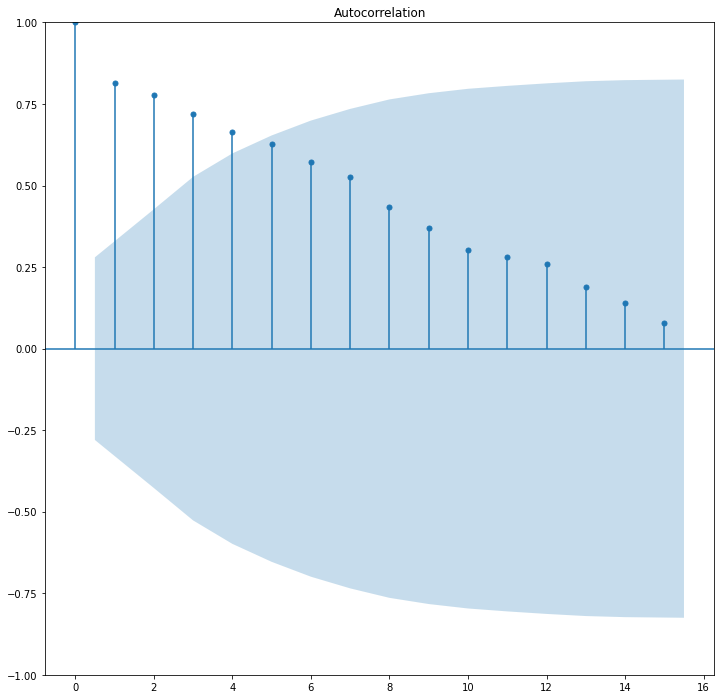

In [322]:
plot_acf(df_99KPI['volume'],lags=15)
plt.show()

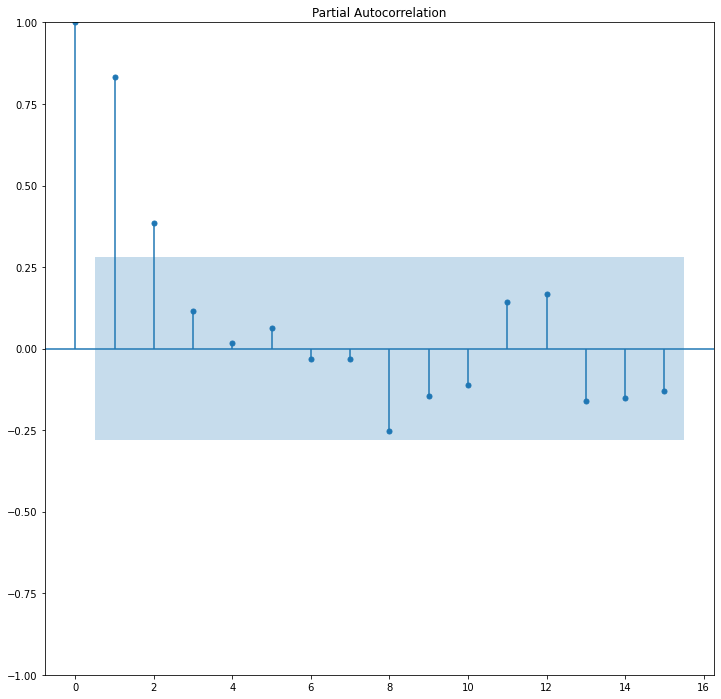

In [323]:
plot_pacf(df_99KPI['volume'],lags=15)
plt.show()

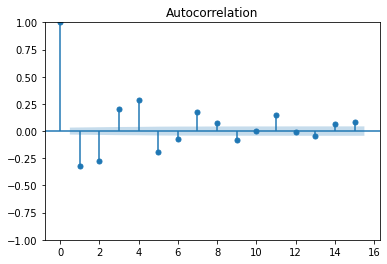

In [24]:
plot_acf(df_KPI['volume'],lags=15)
plt.show()

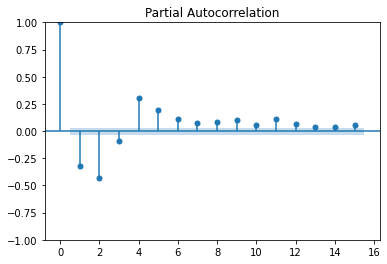

In [25]:
plot_pacf(df_KPI['volume'],lags=15)
plt.show()

In [26]:
print(len(df_KPI)*0.8)
train_df = df_KPI[0:3000]
test_df = df_KPI[3000::]
print(len(df_KPI))
print(len(train_df))
print(len(test_df))

2973.6000000000004
3717
3000
717


In [148]:
df_KPI.head()


volume
Date              
2019-10-31    7435
2019-11-30   52302
2019-12-31   52099
2020-01-31   58106
2020-02-29   53051

In [170]:
from itertools import product
from tqdm import tqdm_notebook

In [171]:
def sarima(parameter_list, d,D,s,exog):
    result =[]
    for param in tqdm_notebook(parameter_list):
        try:
            model = SARIMAX(exog, order=(param[0],d,param[1]),
                          seasonal_order=(param[2],D,param[3],s)).fit()
        except:
            continue
        aic = model.aic
        result.append([param, aic])
    result_df = pd.DataFrame(result)
    result_df.columns = ['(p,q)x(P,Q)','AIC']
    result_df = result_df.sort_values(by = 'AIC', ascending = True).reset_index(drop = True)
    return result_df

In [332]:
p = range(0,4,1)
d = 2
q = range(0,4,1)
D = 2
P = range(0,4,1)
Q = range(0,4,1)
s = 7
parameters = product(p,q,P,Q)
parameter_list = list(parameters)
print(len(parameter_list))

256


In [333]:
result_df=sarima(parameter_list,1,1,4,df_99KPI['volume'])

  0%|          | 0/256 [00:00<?, ?it/s]

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [334]:
result_df

(p,q)x(P,Q)         AIC
0    (0, 0, 2, 2)  946.676891
1    (1, 1, 0, 2)  946.870549
2    (0, 0, 3, 1)  947.161940
3    (0, 0, 2, 0)  947.757098
4    (0, 0, 2, 1)  948.538497
..            ...         ...
251  (1, 0, 0, 0)  996.328868
252  (0, 2, 0, 0)  996.384939
253  (2, 0, 0, 0)  998.233365
254  (3, 0, 0, 0)  999.228414
255  (0, 0, 0, 0)  999.926553

[256 rows x 2 columns]

In [144]:
from statsmodels.tsa.arima.model import ARIMA
arima_model = ARIMA(train_df['volume'],order=(3,2,1)).fit()

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


0.1283697147690315


C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: >

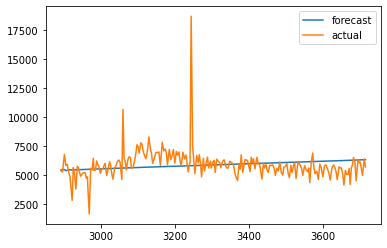

In [145]:
df_arima_forecast1=pd.DataFrame()
df_arima_forecast1['forecast'] = arima_model.predict(start=801,end=1024)
df_arima_forecast1.index=test_df.index
df_arima_forecast1['actual'] = test_df['volume']
print(mean_absolute_percentage_error(df_arima_forecast1['forecast'], df_arima_forecast1['actual']))
df_arima_forecast1.plot()

In [61]:
sarimax_model1=SARIMAX(df_KPI['volume'],order=(3,1,1),seasonal_order=(4,1,2,24)).fit()

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


0.1276964104411638


<Axes: >

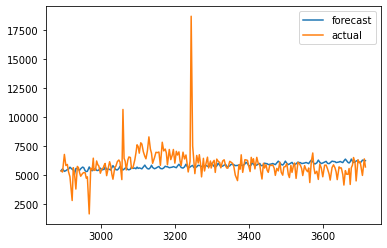

In [29]:
df_sarimax_forecast1=pd.DataFrame()
df_sarimax_forecast1['forecast'] = sarimax_model1.predict(start=801,end=1024)
df_sarimax_forecast1.index=test_df.index
df_sarimax_forecast1['actual'] = test_df['volume']
print(mean_absolute_percentage_error(df_sarimax_forecast1['forecast'], df_sarimax_forecast1['actual']))
#df_sarimax_forecast1.plot()

In [33]:
forecast_days = pd.bdate_range(start='2024-01-01',end='2024-12-01',freq='MS')

In [34]:
forecast_days.shape

(12,)

In [37]:
df_forecast=pd.DataFrame()
df_forecast['forecast'] =sarimax_model1.predict(start=1229, end=1036)
df_forecast['Date']=forecast_days

C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [38]:
df_forecast[['Date','forecast']].to_csv('F&G PHS Transaction Volume Forecast_KPI-Month-99KPI.csv',index=False)

In [ ]:
------------------------------------------------------------------------------------------------------------------------

In [147]:
df_LP=df_KPI[df_KPI['Service_Category']=='Late Payment Notifications']

In [151]:
df_LP.shape

(988, 3)

In [152]:
df_LP.to_csv("KPI Late Payment.csv",index=False)

In [153]:
#All the values on category Late Payment Notifications,Maturities,Submit Change to UW are Zeros for all days#

In [ ]:
----------------------------------------------------------------------------------------------------------

In [34]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from tqdm import tqdm
from prophet import Prophet

In [ ]:
df_KPI=df_KPI.rename(columns={'Date': 'ds', 'volume': 'y'})

In [ ]:
 param_grid = {  
'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
'seasonality_mode': ['multiplicative', 'additive'],
'growth': ['linear', 'logistic'],
'yearly_seasonality':[5,10,20,40],
'weekly_seasonality':[5,10,20,40],
'daily_seasonality':[5,10,20,40],
}

In [ ]:
import itertools
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
rmses = []

In [ ]:
for params in all_params:
    m = Prophet(**params).fit(df_KPI)
    df_cv = cross_validation(m, horizon='10 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

In [ ]:
# Find the best parameters
tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

In [ ]:
best_params = all_params[np.argmin(rmses)]

In [ ]:
print(best_params)

In [35]:
# prophet_model = Prophet(growth = 'linear',holidays_prior_scale=200, daily_seasonality=7,changepoint_range=1,changepoint_prior_scale=0.001,yearly_seasonality=40,seasonality_prior_scale=0.01, weekly_seasonality=10,seasonality_mode='multiplicative')
# prophet_model.add_seasonality(name='weekly', period=6, fourier_order=20,prior_scale=25)
# prophet_model.add_seasonality(name='monthly', period=30, fourier_order=12,prior_scale=30)
# prophet_model.add_seasonality(name='yearly', period=365, fourier_order=24,prior_scale=60)
# prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40)##21.2%

In [447]:
prophet_model = Prophet(growth = 'linear',holidays_prior_scale=200, daily_seasonality=7,changepoint_range=1,changepoint_prior_scale=0.001,yearly_seasonality=40,seasonality_prior_scale=0.01, weekly_seasonality=10,seasonality_mode='multiplicative')
prophet_model.add_seasonality(name='weekly_off_season', period=8, fourier_order=20,prior_scale=25)
prophet_model.add_seasonality(name='monthly', period=30, fourier_order=12,prior_scale=30)
prophet_model.add_seasonality(name='yearly', period=365, fourier_order=24,prior_scale=60)
prophet_model.add_seasonality(name='daily',period=2,fourier_order=80,prior_scale=40)

In [465]:
prophet_model = Prophet(growth = 'linear',holidays_prior_scale=100, daily_seasonality=7,changepoint_range=1,changepoint_prior_scale=0.001,yearly_seasonality=40,seasonality_prior_scale=0.01, weekly_seasonality=10,seasonality_mode='multiplicative')
prophet_model.add_seasonality(name='weekly_off_season', period=8, fourier_order=20,prior_scale=25)
prophet_model.add_seasonality(name='monthly', period=30, fourier_order=12,prior_scale=30)
prophet_model.add_seasonality(name='yearly', period=365, fourier_order=24,prior_scale=60)
prophet_model.add_seasonality(name='daily',period=1,fourier_order=80,prior_scale=40) #18.1%

In [457]:
pro_train = train_df.copy()
pro_test = test_df.copy()

In [458]:
pro_train = pro_train.reset_index()
pro_test = pro_test.reset_index()

In [459]:
pro_train = pro_train.rename(columns={'Date': 'ds', 'volume': 'y'})
pro_test = pro_test.rename(columns={'Date': 'ds', 'volume': 'y'})

In [460]:
prophet_model.fit(pro_train)

18:31:20 - cmdstanpy - INFO - CmdStan installation C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
18:31:20 - cmdstanpy - INFO - CmdStan installation C:\Users\255046\AppData\Local\Programs\Python\Python39\lib\site-packages\prophet\stan_model\cmdstan-2.26.1 missing makefile, cannot get version.
18:31:20 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
18:31:20 - cmdstanpy - INFO - Cannot determine whether version is before 2.28.
18:31:20 - cmdstanpy - INFO - CmdStan start processing
18:31:20 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:44:12 - cmdstanpy - INFO - CmdStan done processing.
18:44:12 - cmdstanpy - INFO - CmdStan done processing.
18:44:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.s

18:44:12 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
Exception: normal_id_glm_lpdf: Scale vector is 0, but must be positive finite! (in 'D:/a/prophet/prophet/python/stan/prophet.stan', line 137, column 2 to line 142, column 4)
	Exception: normal_id_glm_lpdf: Scale vector is 0, but must be

18:44:12 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 50 iterations at max treedepth (100.0%)
	Chain 2 had 50 iterations at max treedepth (100.0%)
	Chain 3 had 50 iterations at max treedepth (100.0%)
	Chain 4 had 50 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.
18:44:12 - cmdstanpy - WARNING - Some chains may have failed to converge.
	Chain 1 had 50 iterations at max treedepth (100.0%)
	Chain 2 had 50 iterations at max treedepth (100.0%)
	Chain 3 had 50 iterations at max treedepth (100.0%)
	Chain 4 had 50 iterations at max treedepth (100.0%)
	Use function "diagnose()" to see further information.


In [461]:
future = pd.DataFrame()
future['ds'] = pro_test['ds']

In [462]:
prophet_forecast = prophet_model.predict(future)

In [463]:
from sklearn.metrics import *

In [464]:
mean_absolute_percentage_error(prophet_forecast['yhat'],pro_test['y'])

0.27391522344301206

0.27391522344301206

In [423]:
forecast=pd.DataFrame()
forecast['forecast'] =prophet_forecast['yhat']

In [78]:
df_KPI_test=df_KPI[700::]

In [79]:
df_KPI_test = df_KPI_test.set_index('Date')

In [425]:
forecast.index=pro_test['ds']

In [424]:
forecast['actual'] = pro_test['y']

In [426]:
forecast.head()

forecast  actual
ds                             
2023-04-12  6253.596641    6728
2023-04-13  6039.957650    7213
2023-04-14  5541.265636    6038
2023-04-15   816.142810     312
2023-04-17  5930.606544    7055

forecast  actual
ds                             
2023-04-12  6253.596641    6728
2023-04-13  6039.957650    7213
2023-04-14  5541.265636    6038
2023-04-15   816.142810     312
2023-04-17  5930.606544    7055

In [427]:
forecast[['forecast','actual']].to_csv('volume_forecast_KPI.csv')

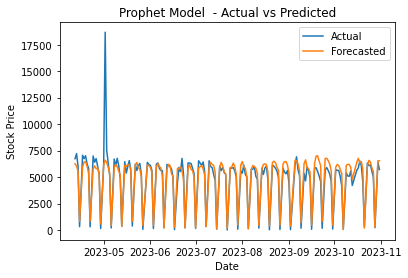

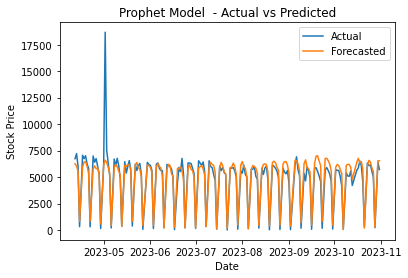

In [428]:
%matplotlib inline
plt.plot(pro_test['ds'], pro_test['y'], label='Actual')
plt.plot(prophet_forecast['ds'],prophet_forecast['yhat'], label='Forecasted')
plt.title('Prophet Model  - Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
----------------------------------------------------------------------------------------

In [ ]:
df_KPI['Date']=df_KPI['Date'].dt.date
df_KPI['Date']=pd.to_datetime(df_KPI['Date'])

In [ ]:
df_KPI = df_KPI.groupby('Date', as_index=False)['volume'].sum()

In [ ]:
df1['volume']=df1['Level_2_Yes'] + df1['Level_2_No']

In [ ]:
df1.head()

In [ ]:
df1 = df1[['Date','volume']]

In [ ]:
df1['Date']=df1['Date'].dt.date
df1['Date']=pd.to_datetime(df1['Date'])

In [ ]:
df1 = df1.groupby('Date', as_index=False)['volume'].sum()

In [ ]:
df1.shape

In [ ]:
print(len(df1)*0.8)
# train_df = df1[0:20]
# test_df = df1[20::]
# print(len(df1))
# print(len(train_df))
# print(len(test_df))

In [ ]:
SLA-----------------------------------------------------------------------------------

In [3]:
from mlforecast import MLForecast

In [5]:
from window_ops.rolling import rolling_mean, rolling_max, rolling_min
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
import re
import pickle
import warnings
warnings.filterwarnings('ignore')

from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error,r2_score

In [6]:
df00  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\SLA - 2019.xlsx')
df0  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\SLA - 2020.xlsx')
df1  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\SLA - 2021.xlsx')
df2  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\SLA - 2022.xlsx')
df3  = pd.read_excel(r'C:\Users\255046\OneDrive - NTT DATA Group\Documents\F&G PHS Transaction volume\SLA - 2023.xlsx')

In [7]:
df00['volume']=df00['Level_2_Yes'] + df00['Level_2_No']
df0['volume']=df0['Level_2_Yes'] + df0['Level_2_No']
df1['volume']=df1['Level_2_Yes'] + df1['Level_2_No']
df2['volume']=df2['Level_2_Yes'] + df2['Level_2_No']
df3['volume']=df3['Level_2_Yes'] + df3['Level_2_No']

In [8]:
df00=df00[['Date','Service_Category','volume']]
df0=df0[['Date','Service_Category','volume']]
df1 = df1[['Date','Service_Category','volume']]
df2 = df2[['Date','Service_Category','volume']]
df3 = df3[['Date','Service_Category','volume']]

In [9]:
df00['Date']=df00['Date'].dt.date
df00['Date']=pd.to_datetime(df00['Date'])
df00=pd.DataFrame(df00.groupby('Service_Category').resample('M',on='Date').sum().reset_index())

In [10]:
df0['Date']=df0['Date'].dt.date
df0['Date']=pd.to_datetime(df0['Date'])
df0 = df0.groupby('Service_Category').resample('M', on='Date').sum().reset_index()

In [11]:
df1['Date']=df1['Date'].dt.date
df1['Date']=pd.to_datetime(df1['Date'])
df1 = df1.groupby('Service_Category').resample('M', on='Date').sum().reset_index()

In [12]:
df2['Date']=pd.to_datetime(df2['Date'])
df2 = df2.groupby('Service_Category').resample('M',on='Date').sum().reset_index()

In [13]:
df3['Date']=df3['Date'].dt.date
df3['Date']=pd.to_datetime(df3['Date'])
df3 = df3.groupby('Service_Category').resample('M', on='Date').sum().reset_index()

In [14]:
df_SLA=pd.concat([df00,df0,df1,df2,df3],ignore_index=True)

In [16]:
df_SLA = df_SLA.rename(columns={'Service_Category': 'unique_id', 'volume': 'y', 'Date': 'ds'})
df_SLA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1175 entries, 0 to 1174
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   unique_id  1175 non-null   object        
 1   ds         1175 non-null   datetime64[ns]
 2   y          1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.7+ KB


In [19]:
len(df_SLA)*0.8

940.0

In [23]:
df_SLA.tail()

unique_id         ds       y
1170  Transfers 2023-06-30  4031.0
1171  Transfers 2023-07-31  3850.0
1172  Transfers 2023-08-31  4560.0
1173  Transfers 2023-09-30  4335.0
1174  Transfers 2023-10-31  4947.0

In [24]:
train = df_SLA.loc[df_SLA['ds'] < '2023-05-31']
valid = df_SLA.loc[(df_SLA['ds'] >= '2023-05-31') & (df_SLA['ds'] < '2023-10-31')] 
h = valid['ds'].nunique()

In [25]:
models = [XGBRegressor(random_state=0, n_estimators=100)]

model = MLForecast(models=models,
                   freq='D',
                   lags=[1,7,14],
                   lag_transforms={
                       1: [(rolling_mean, 7), (rolling_max, 7), (rolling_min, 7)],
                   },
                   date_features=['dayofweek', 'month'],
                   num_threads=6)


model.fit(train, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

MLForecast(models=[XGBRegressor], freq=<Day>, lag_features=['lag1', 'lag7', 'lag14', 'rolling_mean_lag1_window_size7', 'rolling_max_lag1_window_size7', 'rolling_min_lag1_window_size7'], date_features=['dayofweek', 'month'], num_threads=6)

In [26]:
p = model.predict(horizon=941)
p = p.merge(valid[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='right')

In [27]:
p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   unique_id     120 non-null    object        
 1   ds            120 non-null    datetime64[ns]
 2   XGBRegressor  120 non-null    float32       
 3   y             120 non-null    float64       
dtypes: datetime64[ns](1), float32(1), float64(1), object(1)
memory usage: 4.2+ KB


In [43]:
p.sample(10)

unique_id         ds  XGBRegressor        y
16                 Changes - UW not Required 2023-06-30   6341.598145  23194.0
26                Late Payment Notifications 2023-06-30     89.386459    156.0
21            Info or Documentation Requests 2023-06-30   3282.239258   8903.0
111       Time to Send Notice of Replacement 2023-06-30   1341.749268   4135.0
5                             Annuitizations 2023-05-31    103.087784    298.0
52                             Reallocations 2023-07-31    511.127869   1796.0
1          Allocate Ongoing Premium Payments 2023-06-30    471.207703    826.0
28                Late Payment Notifications 2023-08-31     69.069702    182.0
53                             Reallocations 2023-08-31    477.194366   1947.0
106  Time to Review Application Requirements 2023-06-30   2999.265137   6816.0

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(p['y'], p['XGBRegressor'])

8256774542563753.0

In [47]:
p.sample(10)

unique_id         ds  XGBRegressor        y
81                     Time to Issue Policy 2023-06-30     18.290232  13137.0
97   Time to Process Cancellation/Rejection 2023-07-31      2.391586   3536.0
48                        Periodic Payments 2023-08-31      2.366148   1566.0
112      Time to Send Notice of Replacement 2023-07-31      2.391586   3129.0
40                       Partial Surrenders 2023-05-31     79.592133   4490.0
89                        Time to Pay Claim 2023-09-30      0.330896      0.0
82                     Time to Issue Policy 2023-07-31      3.099151  11563.0
39                               Maturities 2023-09-30      2.335656     22.0
41                       Partial Surrenders 2023-06-30      7.608853   4635.0
100            Time to Review Annuity Check 2023-05-31    174.006485   5949.0

In [33]:
import optuna
def objective(trial):
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    subsample = trial.suggest_uniform('subsample', 0.1, 1.0)
    colsample_bytree = trial.suggest_uniform('colsample_bytree', 0.1, 1.0)
    
    lags = trial.suggest_int('lags', 14, 56, step=7) # step means we only try multiples of 7 starting from 14

    models = [XGBRegressor(random_state=0, n_estimators=500,    learning_rate=learning_rate, max_depth=max_depth,
                           min_child_weight=min_child_weight, subsample=subsample, colsample_bytree=colsample_bytree)]

    model = MLForecast(models=models,
                    freq='M',
                    lags=[1,7, lags],
                    lag_transforms={
                       1: [(rolling_mean, 7), (rolling_max, 7), (rolling_min, 7)],
                   }, # removing this is better
                    date_features=['dayofweek', 'month'],
                    num_threads=6)


    model.fit(train, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

    p = model.predict(horizon=926)
    p = p.merge(valid[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='right')

    error = mean_absolute_percentage_error(p['y'], p['XGBRegressor'])
    
    return error

In [34]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

[I 2024-01-05 14:49:52,763] A new study created in memory with name: no-name-306c57da-9917-46ae-8ef9-4eb6375769ba
[I 2024-01-05 14:50:13,554] Trial 0 finished with value: 9085276033559210.0 and parameters: {'learning_rate': 0.0014291827603979941, 'max_depth': 3, 'min_child_weight': 8, 'subsample': 0.15121056111061085, 'colsample_bytree': 0.14414255027202388, 'lags': 42}. Best is trial 0 with value: 9085276033559210.0.
[I 2024-01-05 14:50:34,317] Trial 1 finished with value: 1.045582200204602e+16 and parameters: {'learning_rate': 0.08507395713392167, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.6830337132652036, 'colsample_bytree': 0.472538280757553, 'lags': 28}. Best is trial 0 with value: 9085276033559210.0.
[I 2024-01-05 14:50:54,520] Trial 2 finished with value: 2607718761164527.5 and parameters: {'learning_rate': 0.08626481561433466, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.9072751271143107, 'colsample_bytree': 0.3095221309937279, 'lags': 28}. Best is trial 2 

[14:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:07] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:53:21,877] Trial 10 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.00434681728320774, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.4059302550678825, 'colsample_bytree': 0.5731584308667798, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:53:37,404] Trial 11 finished with value: 1734249239403998.5 and parameters: {'learning_rate': 0.007880894731872343, 'max_depth': 8, 'min_child_weight': 10, 'subsample': 0.4067616967044829, 'colsample_bytree': 0.9618641429856183, 'lags': 14}. Best is trial 3 with value: 19143041972088.074.


[14:53:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:53:37] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:53:53,318] Trial 12 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.006451358399771172, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.10505962581343525, 'colsample_bytree': 0.6745467765115565, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:54:08,485] Trial 13 finished with value: 296992778555665.56 and parameters: {'learning_rate': 0.003947677489580864, 'max_depth': 7, 'min_child_weight': 6, 'subsample': 0.3345005288169409, 'colsample_bytree': 0.8147629802056121, 'lags': 14}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:54:23,036] Trial 14 finished with value: 8.458062832403306e+17 and parameters: {'learning_rate': 0.01244562426104116, 'max_depth': 5, 'min_child_weight': 10, 'subsample': 0.4745943425339487, 'colsample_bytree': 0.5829867986733864, 'lags': 42}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:54:38,609] Trial 15 finished with value: 217918511478648.0 and 

[14:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:54:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:54:53,165] Trial 16 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.009633434444876075, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.5005165420758375, 'colsample_bytree': 0.6865586704280544, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:55:08,223] Trial 17 finished with value: 8200491582077884.0 and parameters: {'learning_rate': 0.006068719867197892, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.22833602872225434, 'colsample_bytree': 0.48121864026984795, 'lags': 21}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:55:24,192] Trial 18 finished with value: 4.001044988669461e+16 and parameters: {'learning_rate': 0.012899983029258762, 'max_depth': 7, 'min_child_weight': 7, 'subsample': 0.12727068763231242, 'colsample_bytree': 0.991901837085109, 'lags': 35}. Best is trial 3 with value: 19143041972088.074.


[14:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:24] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:55:39,090] Trial 19 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.00227729576889609, 'max_depth': 9, 'min_child_weight': 4, 'subsample': 0.3315464449147104, 'colsample_bytree': 0.6574389969761445, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:55:54,229] Trial 20 finished with value: 7971356222160896.0 and parameters: {'learning_rate': 0.005046026555681154, 'max_depth': 4, 'min_child_weight': 2, 'subsample': 0.6286353634452222, 'colsample_bytree': 0.8101215777102985, 'lags': 21}. Best is trial 3 with value: 19143041972088.074.


[14:55:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:55:54] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:56:08,529] Trial 21 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.00438515829368621, 'max_depth': 10, 'min_child_weight': 5, 'subsample': 0.3955772432886212, 'colsample_bytree': 0.5650426424590655, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.


[14:56:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:08] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:56:23,819] Trial 22 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.007291753731051545, 'max_depth': 10, 'min_child_weight': 4, 'subsample': 0.2124015089783157, 'colsample_bytree': 0.5997940234135961, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.


[14:56:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:23] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:56:38,965] Trial 23 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.0038916609097987016, 'max_depth': 9, 'min_child_weight': 7, 'subsample': 0.4425155655198497, 'colsample_bytree': 0.49240548658625927, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.


[14:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:56:39] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:56:54,266] Trial 24 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.008872040530249285, 'max_depth': 9, 'min_child_weight': 9, 'subsample': 0.33104536183498123, 'colsample_bytree': 0.7295573249417823, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:57:10,201] Trial 25 finished with value: 2.481433246642995e+16 and parameters: {'learning_rate': 0.0028908862284744295, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.5262938604293075, 'colsample_bytree': 0.5966521739621709, 'lags': 42}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:57:27,672] Trial 26 finished with value: 2377071339556045.0 and parameters: {'learning_rate': 0.005218717195728192, 'max_depth': 6, 'min_child_weight': 2, 'subsample': 0.15961534423664298, 'colsample_bytree': 0.43351752482508255, 'lags': 35}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:57:43,897] Trial 27 finished with value: 487532877840384.56

[14:57:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:57:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:57:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:57:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:57:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:57:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:57:58,887] Trial 28 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.0038261502262395566, 'max_depth': 8, 'min_child_weight': 8, 'subsample': 0.39328682824487793, 'colsample_bytree': 0.6716142435715458, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:58:14,147] Trial 29 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.001334519910979845, 'max_depth': 3, 'min_child_weight': 9, 'subsample': 0.10319604941644613, 'colsample_bytree': 0.6339586469731886, 'lags': 42}. Best is trial 3 with value: 19143041972088.074.


[14:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:14] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:58:28,558] Trial 30 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.0017199775408670078, 'max_depth': 9, 'min_child_weight': 6, 'subsample': 0.172312865838966, 'colsample_bytree': 0.5342685837329589, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.


[14:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:28] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:58:44,390] Trial 31 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.006213928675872024, 'max_depth': 8, 'min_child_weight': 6, 'subsample': 0.11998588686645693, 'colsample_bytree': 0.7183442354237493, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.


[14:58:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:58:59,386] Trial 32 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.005962746984381028, 'max_depth': 10, 'min_child_weight': 7, 'subsample': 0.25025692937395166, 'colsample_bytree': 0.621372082795877, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.


[14:58:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:58:59] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 14:59:14,288] Trial 33 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.007640912763095694, 'max_depth': 9, 'min_child_weight': 8, 'subsample': 0.17388195733522027, 'colsample_bytree': 0.6839592347270795, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:59:29,244] Trial 34 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.011524122422375762, 'max_depth': 10, 'min_child_weight': 9, 'subsample': 0.1158125070135143, 'colsample_bytree': 0.7640803718424297, 'lags': 42}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 14:59:44,130] Trial 35 finished with value: 3.39148022044968e+17 and parameters: {'learning_rate': 0.003135214748000138, 'max_depth': 8, 'min_child_weight': 4, 'subsample': 0.30132610493108203, 'colsample_bytree': 0.6325821243380616, 'lags': 42}. Best is trial 3 with value: 19143041972088.074.


[14:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[14:59:44] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 15:00:01,002] Trial 36 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.010278171071832602, 'max_depth': 5, 'min_child_weight': 2, 'subsample': 0.1909624684327291, 'colsample_bytree': 0.7688305585750199, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.


[15:00:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:00:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:00:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:00:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:00:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:00:01] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 15:00:16,500] Trial 37 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.0160364789089643, 'max_depth': 10, 'min_child_weight': 3, 'subsample': 0.22970595236126184, 'colsample_bytree': 0.7046799969215837, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 15:00:31,437] Trial 38 finished with value: 1.97382506352214e+16 and parameters: {'learning_rate': 0.007003622427962451, 'max_depth': 3, 'min_child_weight': 7, 'subsample': 0.7289999835890018, 'colsample_bytree': 0.5568136875383366, 'lags': 35}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 15:00:46,406] Trial 39 finished with value: 3009095820343159.5 and parameters: {'learning_rate': 0.00476095697061257, 'max_depth': 6, 'min_child_weight': 10, 'subsample': 0.26557892063610783, 'colsample_bytree': 0.6428021280717695, 'lags': 28}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 15:01:03,132] Trial 40 finished with value: 2208163518620194.8 and 

[15:01:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:03] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 15:01:18,584] Trial 41 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.00867757827607865, 'max_depth': 5, 'min_child_weight': 8, 'subsample': 0.4598490811469157, 'colsample_bytree': 0.7053489066837122, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.


[15:01:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 15:01:33,621] Trial 42 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.010550632896306436, 'max_depth': 4, 'min_child_weight': 9, 'subsample': 0.5101584120631751, 'colsample_bytree': 0.6980614280043552, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 15:01:48,717] Trial 43 finished with value: 1.0357627453247762e+17 and parameters: {'learning_rate': 0.015499627806776916, 'max_depth': 6, 'min_child_weight': 8, 'subsample': 0.1524431094261826, 'colsample_bytree': 0.669797892347028, 'lags': 42}. Best is trial 3 with value: 19143041972088.074.


[15:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:01:48] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 15:02:04,683] Trial 44 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.02143496271609781, 'max_depth': 5, 'min_child_weight': 6, 'subsample': 0.2938244699088364, 'colsample_bytree': 0.7705172842734678, 'lags': 56}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 15:02:22,188] Trial 45 finished with value: 2876331079779396.5 and parameters: {'learning_rate': 0.005301692148364275, 'max_depth': 5, 'min_child_weight': 9, 'subsample': 0.2065558453931127, 'colsample_bytree': 0.5997116764678169, 'lags': 14}. Best is trial 3 with value: 19143041972088.074.


[15:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:22] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 15:02:37,539] Trial 46 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.0067594223316895085, 'max_depth': 4, 'min_child_weight': 8, 'subsample': 0.36549694730809934, 'colsample_bytree': 0.8377067901819659, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 15:02:53,004] Trial 47 finished with value: 1.2343350034309666e+17 and parameters: {'learning_rate': 0.009584679591777116, 'max_depth': 5, 'min_child_weight': 5, 'subsample': 0.41779597863388285, 'colsample_bytree': 0.8957944254178768, 'lags': 42}. Best is trial 3 with value: 19143041972088.074.


[15:02:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:1517: Empty dataset at worker: 0
[15:02:53] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group

[I 2024-01-05 15:03:08,901] Trial 48 finished with value: 93824992236886.3 and parameters: {'learning_rate': 0.013315850904543519, 'max_depth': 7, 'min_child_weight': 10, 'subsample': 0.1009010221198421, 'colsample_bytree': 0.8031721777634744, 'lags': 49}. Best is trial 3 with value: 19143041972088.074.
[I 2024-01-05 15:03:24,821] Trial 49 finished with value: 238183701737199.44 and parameters: {'learning_rate': 0.003461603829555163, 'max_depth': 8, 'min_child_weight': 7, 'subsample': 0.46038409626058485, 'colsample_bytree': 0.7291595307574275, 'lags': 28}. Best is trial 3 with value: 19143041972088.074.


In [35]:
study.best_params

{'learning_rate': 0.005332564896170275,
 'max_depth': 10,
 'min_child_weight': 2,
 'subsample': 0.46194989466311454,
 'colsample_bytree': 0.5968404341649315,
 'lags': 21}

In [48]:
models = [XGBRegressor(random_state=0,
                       n_estimators=100, max_depth=10,
                       learning_rate= 0.0053,min_child_weight=2,
                       subsample=0.46194989466311454,colsample_bytree=0.5968404341649315,
                       )]

model = MLForecast(models=models,
                   freq='M',
                   lags=[21],
                   lag_transforms={
                       1: [(rolling_mean, 7), (rolling_max, 7), (rolling_min, 7)],
                   },
                   date_features=['dayofweek', 'month'],
                   num_threads=6)


model.fit(train, id_col='unique_id', time_col='ds', target_col='y', static_features=[])

MLForecast(models=[XGBRegressor], freq=<MonthEnd>, lag_features=['lag21', 'rolling_mean_lag1_window_size7', 'rolling_max_lag1_window_size7', 'rolling_min_lag1_window_size7'], date_features=['dayofweek', 'month'], num_threads=6)

In [49]:
p = model.predict(horizon=941)
p = p.merge(valid[['unique_id', 'ds', 'y']], on=['unique_id', 'ds'], how='right')

In [50]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(p['y'], p['XGBRegressor'])

61673318925380.945

IndexError: index 10 is out of bounds for axis 0 with size 10

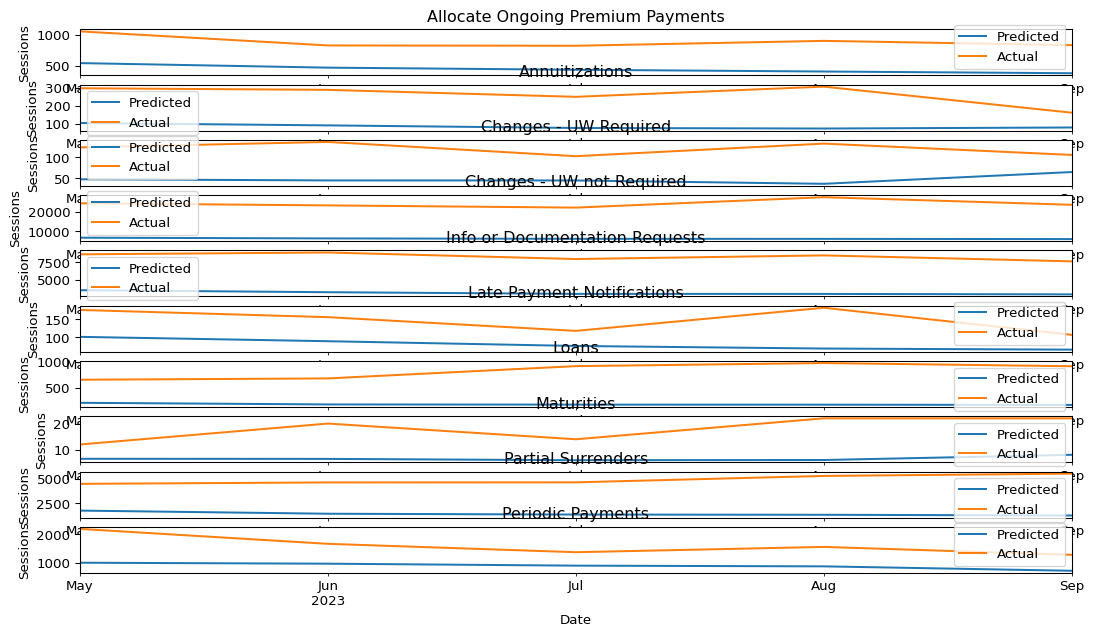

In [54]:
fig,ax = plt.subplots(10,1,figsize=(1280/96, 720/96), dpi=96)
for ax_, device in enumerate(p['unique_id'].unique()):
    p_ = p.loc[p['unique_id'] == device]
    p_.rename(columns={'XGBRegressor': 'Predicted', 'y': 'Actual'}, inplace=True)
    p_.plot(x='ds', y=['Predicted', 'Actual'], ax=ax[ax_], title=device)
    ax[ax_].set_xlabel('Date')
    ax[ax_].set_ylabel('Sessions')
fig.tight_layout()

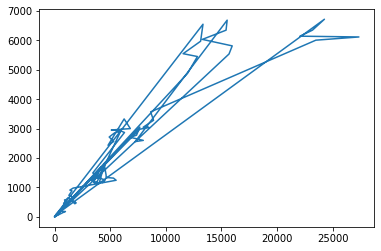

In [39]:
plt.plot(p['y'], p['XGBRegressor'])

In [41]:
p['XGBRegressor']

0       543.823608
1       471.207703
2       437.202423
3       409.582703
4       381.810791
          ...     
115    1831.035278
116    1392.814087
117    1335.750122
118    1258.874878
119    1173.894165
Name: XGBRegressor, Length: 120, dtype: float32